In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import ceil

In [1]:
DATA_DIR = './data/ml-1m'

In [3]:
unames = ['uid', 'gender','age','job','zip']
age_lookup = {1: "Under 18", 18: "18-24", 25: "25-34", 35: "35-44", 45: "45-49", 50: "50-55", 56: "56+"}
job_lookup = ["other", "academic/educator", "artist", "clerical/admin", "college/grad student", "customer service", "doctor/health care", "executive/managerial", "farmer", "homemaker", "K-12 student", "lawyer", "programmer", "retired", "sales/marketing", "scientist", "self-employed", "technician/engineer", "tradesman/craftsman", "unemployed", "writer"]
users = pd.read_table(
    os.path.join(DATA_DIR, 'users.dat'),
    sep='::', names=unames, engine='python')

mnames = ['mid', 'title','genre']
movies = pd.read_table(
    os.path.join(DATA_DIR, 'movies.dat'),
    sep='::', names=mnames, engine='python')
movies['genre'] = movies['genre'].str.strip().str.split('|')

rnames = ["uid", "mid", "rating", "time"]
ratings = pd.read_table(
    os.path.join(DATA_DIR, 'ratings.dat'),
    sep='::', names=rnames, engine='python')

In [4]:
genre_female = ["Animation", "Comedy", "Documentary", "Drama", "Musical", "Romance", "Children's"]
genre_male = ["Action", "Adventure", "Crime", "Fantasy", "Film-Noir", "Horror", "Mystery", "Sci-Fi", "Thriller", "War", "Western"]
genres = genre_female + genre_male

In [4]:
display(users)
display(movies)
display(ratings)

,uid,gender,age,job,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


,mid,title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
3878,3948,Meet the Parents (2000),[Comedy]
3879,3949,Requiem for a Dream (2000),[Drama]
3880,3950,Tigerland (2000),[Drama]
3881,3951,Two Family House (2000),[Drama]


,uid,mid,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [5]:
merged_df = pd.merge(ratings, movies, on='mid')
merged_df = pd.merge(merged_df, users, on='uid')
display(merged_df)

,uid,mid,rating,time,title,genre,gender,age,job,zip
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),[Drama],F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),"[Animation, Children's, Musical]",F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),"[Musical, Romance]",F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),[Drama],F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)","[Animation, Children's, Comedy]",F,1,10,48067
5,1,1197,3,978302268,"Princess Bride, The (1987)","[Action, Adventure, Comedy, Romance]",F,1,10,48067
6,1,1287,5,978302039,Ben-Hur (1959),"[Action, Adventure, Drama]",F,1,10,48067
7,1,2804,5,978300719,"Christmas Story, A (1983)","[Comedy, Drama]",F,1,10,48067
8,1,594,4,978302268,Snow White and the Seven Dwarfs (1937),"[Animation, Children's, Musical]",F,1,10,48067
9,1,919,4,978301368,"Wizard of Oz, The (1939)","[Adventure, Children's, Drama, Musical]",F,1,10,48067


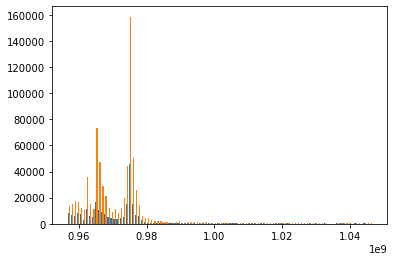

In [6]:
plt.hist([merged_df[merged_df['gender']=='F']['time'], merged_df[merged_df['gender']=='M']['time']], bins=100)
plt.show()

In [8]:
# female_df = female_df[female_df['time'] <= .98e9]

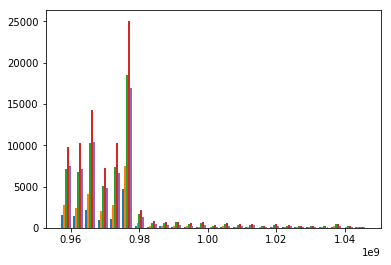

In [11]:
female_df = merged_df[merged_df['gender']=='F']
female_ratings = []
for i in range(1, 6):
    female_ratings.append(
        female_df[female_df['rating'] == i]['time'])
plt.hist(female_ratings, bins=25)
plt.show()


In [10]:
# male_df = male_df[male_df['time'] <= .98e9]

In [9]:
male_df = merged_df[merged_df['gender']=='M']
len(male_df['time'])

753769

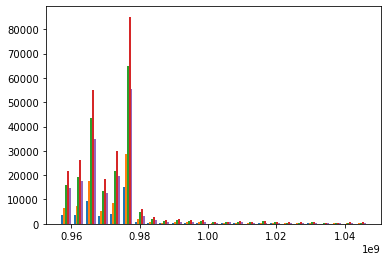

In [11]:
male_ratings = []
for i in range(1, 6):
    male_ratings.append(male_df[male_df['rating'] == i]['time'])
plt.hist(male_ratings, bins=25)
plt.show()

In [12]:
min_f = female_df['time'].min()
min_m = male_df['time'].min()
max_f = female_df['time'].max()
max_m = male_df['time'].max()

In [13]:
num_bins = 25
female_average = []
step = ceil((max_f-min_f)/num_bins)
time_bins = [i for i in range(min_f, max_f, step)]
for i in range(min_f, max_f, step):
    genre_average = []
    temp_df = female_df[(female_df['time'] >= i) & (female_df['time'] < i+step)]
    for g in genres:
        genre_average.append(temp_df[temp_df['genre'].apply(lambda x: g in x)]['rating'].mean())
    female_average.append(genre_average)

In [14]:
female_average = np.array(female_average).T

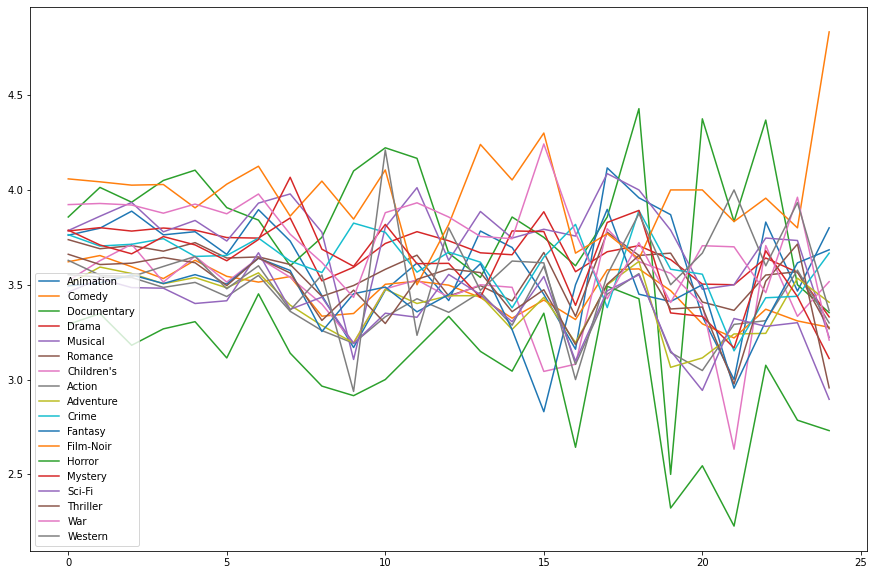

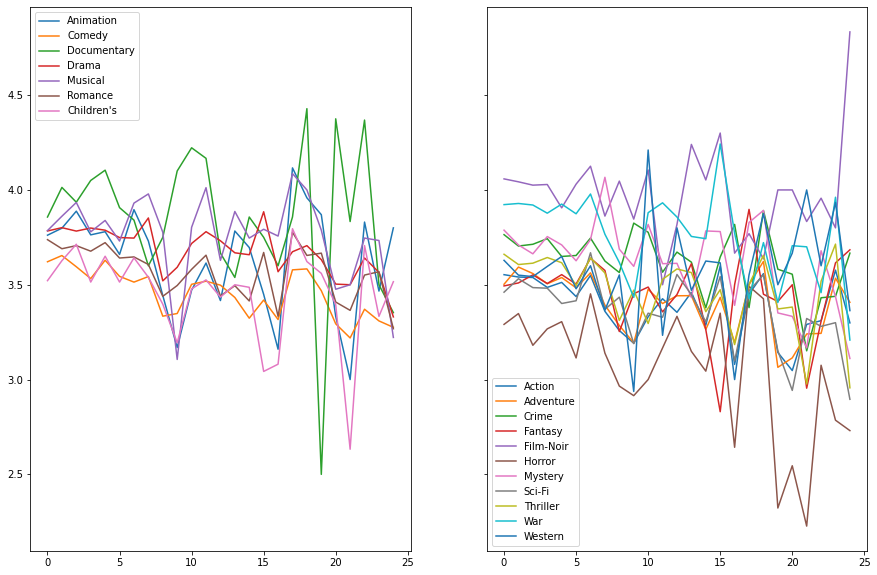

In [15]:
x = [i for i in range(num_bins)]
plt.figure(figsize=(15,10))
for av in female_average:
    plt.plot(x, av)
plt.legend(genres)
plt.show()

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,10))
for i in range(len(genre_female)):
    ax1.plot(x, female_average[i])
ax1.legend(genre_female)
for i in range(len(genre_female), len(genres)):
    ax2.plot(x, female_average[i])
ax2.legend(genre_male)
plt.show()

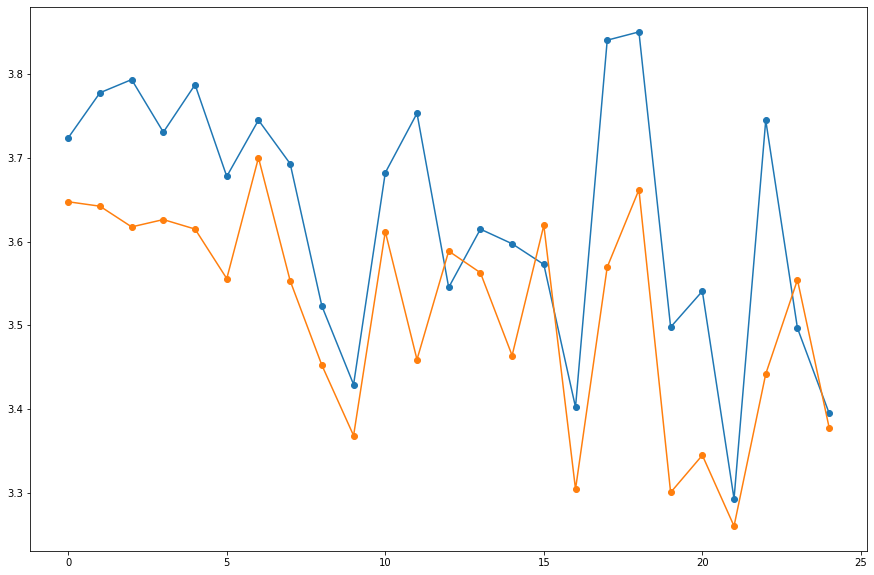

In [16]:
plt.figure(figsize=(15,10))
plt.plot(np.average(female_average[:len(genre_female)], axis=0), '-o')
plt.plot(np.average(female_average[len(genre_female):], axis=0), '-o')
plt.show()

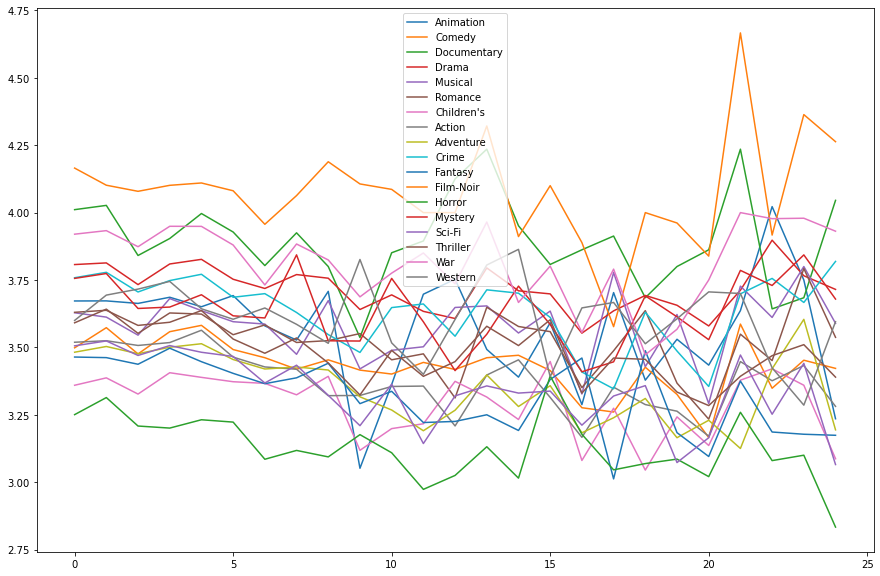

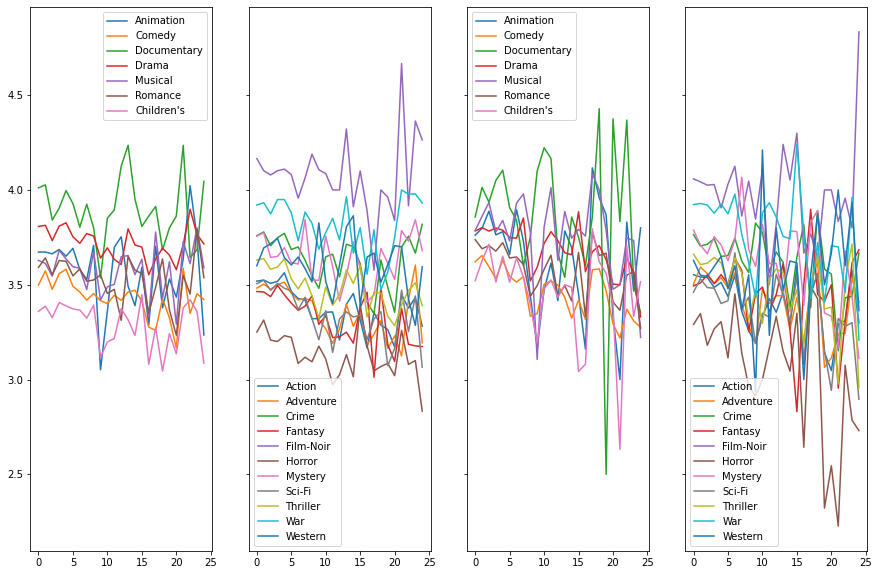

In [17]:
male_average = []
step = ceil((max_f-min_f)/num_bins)
time_bins = [i for i in range(min_f, max_f, step)]
for i in range(min_f, max_f, step):
    genre_average = []
    temp_df = male_df[(male_df['time'] >= i) & (male_df['time'] < i+step)]
    for g in genres:
        genre_average.append(temp_df[temp_df['genre'].apply(lambda x: g in x)]['rating'].mean())
    male_average.append(genre_average)
    
male_average = np.array(male_average).T

x = [i for i in range(num_bins)]
plt.figure(figsize=(15,10))
for av in male_average:
    plt.plot(x, av)
plt.legend(genres)
plt.show()

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15,10))
for i in range(len(genre_female)):
    ax1.plot(x, male_average[i])
ax1.legend(genre_female)
for i in range(len(genre_female), len(genres)):
    ax2.plot(x, male_average[i])
ax2.legend(genre_male)

for i in range(len(genre_female)):
    ax3.plot(x, female_average[i])
ax3.legend(genre_female)
for i in range(len(genre_female), len(genres)):
    ax4.plot(x, female_average[i])
ax4.legend(genre_male)
plt.show()